In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

Kagglers are challenged to build pronoun resolution systems that perform equally well regardless of pronoun gender. 

- [Literature Review](https://www.kaggle.com/ashishpatel26/research-study-of-co-reference-resolutions)
- [EDA - Kernel](https://www.kaggle.com/tminima/genedered-pronoun-resolution-eda)
- [A Machine Learning Approach to Coreference Resolution of Noun Phrases](https://www.mitpressjournals.org/doi/pdfplus/10.1162/089120101753342653)

- [Coreference Resolution](https://nlp.stanford.edu/projects/coref.shtml)
- [Earthquake Prediction](https://www.kaggle.com/c/LANL-Earthquake-Prediction/data)
- [Discourse Analysis](https://www.thoughtco.com/discourse-analysis-or-da-1690462)

In [2]:
#!git clone https://github.com/google-research-datasets/gap-coreference.git

In [3]:
from pathlib import Path 

In [4]:
PATH = Path('./gap-coreference/')

In [5]:
!ls {PATH}

constants.py
CONTRIBUTING.md
gap_scorer.py
gap-development.tsv
gap-test.tsv
gap-validation.tsv
LICENSE
README.md


In [6]:
df = pd.read_csv(PATH/"gap-development.tsv", sep = '\t')
df.shape

(2000, 11)

In [34]:
df.dtypes

ID                object
Text              object
Pronoun           object
Pronoun-offset     int64
A                 object
A-offset           int64
A-coref             bool
B                 object
B-offset           int64
B-coref             bool
URL               object
dtype: object

In [7]:
df.head()

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,True,Pauline,207,False,http://en.wikipedia.org/wiki/List_of_Teachers_...
1,development-2,"He grew up in Evanston, Illinois the second ol...",His,284,MacKenzie,228,True,Bernard Leach,251,False,http://en.wikipedia.org/wiki/Warren_MacKenzie
2,development-3,"He had been reelected to Congress, but resigne...",his,265,Angeloz,173,False,De la Sota,246,True,http://en.wikipedia.org/wiki/Jos%C3%A9_Manuel_...
3,development-4,The current members of Crime have also perform...,his,321,Hell,174,False,Henry Rosenthal,336,True,http://en.wikipedia.org/wiki/Crime_(band)
4,development-5,Her Santa Fe Opera debut in 2005 was as Nuria ...,She,437,Kitty Oppenheimer,219,False,Rivera,294,True,http://en.wikipedia.org/wiki/Jessica_Rivera


In [35]:
df.columns

Index(['ID', 'Text', 'Pronoun', 'Pronoun-offset', 'A', 'A-offset', 'A-coref',
       'B', 'B-offset', 'B-coref', 'URL'],
      dtype='object')

In [8]:
df['Text'][0]

"Zoe Telford -- played the police officer girlfriend of Simon, Maggie. Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again. Phoebe Thomas played Cheryl Cassidy, Pauline's friend and also a year 11 pupil in Simon's class. Dumped her boyfriend following Simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend Pauline."

In [9]:
df['Text'][0][273:300]

' her boyfriend following Si'

In [10]:
df.loc[0]['A']

'Cheryl Cassidy'

In [11]:
df_test = pd.read_csv(PATH/"gap-test.tsv", sep = '\t')
df_test.shape 

(2000, 11)

In [12]:
df_test.head()

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,test-1,Upon their acceptance into the Kontinental Hoc...,His,383,Bob Suter,352,False,Dehner,366,True,http://en.wikipedia.org/wiki/Jeremy_Dehner
1,test-2,"Between the years 1979-1981, River won four lo...",him,430,Alonso,353,True,Alfredo Di St*fano,390,False,http://en.wikipedia.org/wiki/Norberto_Alonso
2,test-3,Though his emigration from the country has aff...,He,312,Ali Aladhadh,256,True,Saddam,295,False,http://en.wikipedia.org/wiki/Aladhadh
3,test-4,"At the trial, Pisciotta said: ``Those who have...",his,526,Alliata,377,False,Pisciotta,536,True,http://en.wikipedia.org/wiki/Gaspare_Pisciotta
4,test-5,It is about a pair of United States Navy shore...,his,406,Eddie,421,True,Rock Reilly,559,False,http://en.wikipedia.org/wiki/Chasers


In [13]:
df.columns

Index(['ID', 'Text', 'Pronoun', 'Pronoun-offset', 'A', 'A-offset', 'A-coref',
       'B', 'B-offset', 'B-coref', 'URL'],
      dtype='object')

In [14]:
df_test.columns

Index(['ID', 'Text', 'Pronoun', 'Pronoun-offset', 'A', 'A-offset', 'A-coref',
       'B', 'B-offset', 'B-coref', 'URL'],
      dtype='object')

In [15]:
df_test.loc[0]

ID                                                           test-1
Text              Upon their acceptance into the Kontinental Hoc...
Pronoun                                                         His
Pronoun-offset                                                  383
A                                                         Bob Suter
A-offset                                                        352
A-coref                                                       False
B                                                            Dehner
B-offset                                                        366
B-coref                                                        True
URL                      http://en.wikipedia.org/wiki/Jeremy_Dehner
Name: 0, dtype: object

In [16]:
def get_random_sample(df):
    return df.loc[random.randint(0, df.shape[0])]

### Task

```You must identify the target of a pronoun within a text passage. The source text is taken from Wikipedia articles. You are provided with the pronoun and two candidate names to which the pronoun could refer. You must create an algorithm capable of deciding whether the pronoun refers to name A, name B, or neither.```

```Markables```: definite noun phrases, demonstrative noun phrases, proper names, appositives, sub–noun phrases that act as modifiers, pronouns, and so on.

```Distance/Distributions``` between two ```markables```

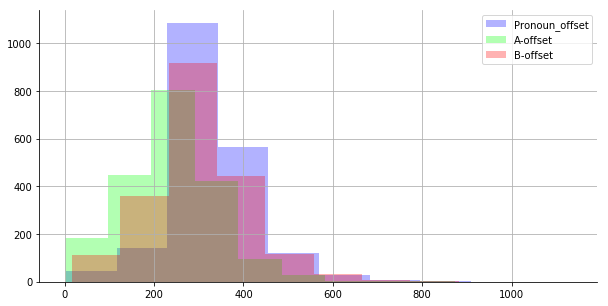

In [17]:
opacity = 0.3
fig, ax = plt.subplots(1,1, figsize=(10,5))
df['Pronoun-offset'].hist(ax=ax, fc=(0, 0, 1, opacity), label='Pronoun_offset') #(R,G,B,A)
df['A-offset'].hist(ax=ax, fc=(0,1,0,opacity), label='A-offset')
df['B-offset'].hist(ax=ax, fc=(1,0,0, opacity), label='B-offset')
ax.legend()
sns.despine()

**Features from the paper**: 
   
Our feature vector consists of a total of 12 features described below, and is derived based on two extracted markables, ```i``` and ```j```, where ```i``` is the ```potential antecedent``` and ```j``` is the ```anaphor```. Information needed to derive the feature vectors is provided by the pipeline of language-processing modules prior to the coreference engine.
    

In [18]:
s = get_random_sample(df)

In [20]:
df.head(n=3).T

,0,1,2
ID,development-1,development-2,development-3
Text,Zoe Telford -- played the police officer girlf...,"He grew up in Evanston, Illinois the second ol...","He had been reelected to Congress, but resigne..."
Pronoun,her,His,his
Pronoun-offset,274,284,265
A,Cheryl Cassidy,MacKenzie,Angeloz
A-offset,191,228,173
A-coref,True,True,False
B,Pauline,Bernard Leach,De la Sota
B-offset,207,251,246
B-coref,False,False,True


In [21]:
len(s['Text']), len(s['Text'].split(' ')), s['Text']

(664,
 114,
 "Walsmear's only reason for proving to himself that the fairies were real, was to assuage his conscience -- to convince himself that she died as a result of seeing fairies, as opposed to her committing suicide from guilt as a result of her having an affair with Walsmear. Castle's interest in the fairies, by this time, was purely self-serving; he fancied he had made an amazing discovery in the garden and prepared to take some photographs of the garden at night, using special lighting techniques. On his way to the garden the next night, however, Castle once again ran into Paolo and Shorty, whom Walsmear hired to steal the photographs from the Templeton house.")

In [40]:
df['Text']

0       Zoe Telford -- played the police officer girlf...
1       He grew up in Evanston, Illinois the second ol...
2       He had been reelected to Congress, but resigne...
3       The current members of Crime have also perform...
4       Her Santa Fe Opera debut in 2005 was as Nuria ...
5       Sandra Collins is an American DJ. She got her ...
6       Reb Chaim Yaakov's wife is the sister of Rabbi...
7       Slant Magazine's Sal Cinquemani viewed the alb...
8       Her father was an Englishman ``of rank and cul...
9       Shaftesbury's UK partners in the production of...
10      William Shatner portraying writer Mark Twain; ...
11      His maternal great-grandfather was Henry Percy...
12      Killian in 1978--79, an assistant district att...
13      ARTA driver Vitantonio Liuzzi will be replaced...
14      Twenty years ago, Lorenzo Uribe discovered tru...
15      A colleague in the department run by Erwin Fri...
16      Maurice custom-tailors clothing for de Var*ze ...
17      In 198

In [41]:
df['sent_len'] = df['Text'].apply(lambda x: len(x))

In [42]:
df.head(n=2).T

,0,1
ID,development-1,development-2
Text,Zoe Telford -- played the police officer girlf...,"He grew up in Evanston, Illinois the second ol..."
Pronoun,her,His
Pronoun-offset,274,284
A,Cheryl Cassidy,MacKenzie
A-offset,191,228
A-coref,True,True
B,Pauline,Bernard Leach
B-offset,207,251
B-coref,False,False


In [55]:
df.apply(lambda row: row['Text'], axis=1)

0       Zoe Telford -- played the police officer girlf...
1       He grew up in Evanston, Illinois the second ol...
2       He had been reelected to Congress, but resigne...
3       The current members of Crime have also perform...
4       Her Santa Fe Opera debut in 2005 was as Nuria ...
5       Sandra Collins is an American DJ. She got her ...
6       Reb Chaim Yaakov's wife is the sister of Rabbi...
7       Slant Magazine's Sal Cinquemani viewed the alb...
8       Her father was an Englishman ``of rank and cul...
9       Shaftesbury's UK partners in the production of...
10      William Shatner portraying writer Mark Twain; ...
11      His maternal great-grandfather was Henry Percy...
12      Killian in 1978--79, an assistant district att...
13      ARTA driver Vitantonio Liuzzi will be replaced...
14      Twenty years ago, Lorenzo Uribe discovered tru...
15      A colleague in the department run by Erwin Fri...
16      Maurice custom-tailors clothing for de Var*ze ...
17      In 198